# Assignment 3 for MQB7046: Modelling Public Health Data
Name: Chin Wei Hong </br>
Matrix Number: 22110451 </br>

## Question:

A cross-sectional study was conducted among 560 participants aged 50 and above living in the community. During the survey, respondents were asked to indicate whether they experienced difficulties with a number of activities of daily living (ADLs). Additionally, sociodemographic data were collected during the interviews. A subset of the dataset (adl.csv) contains the following information:

|Variable|Coding|
|:------:|:----:|
|age|age in years|
|male|male: 0=female, 1= male|
|adl|number of adl difficulties|
|pact|physical activity: 0=inactive, 1=active|
|limitill|limiting long standing illness: 0=no, 1=yes|

Suppose you are interested in the association between physical activity and the number of difficulties with ADLs. Your hypothesis is that physically inactive individuals are associated with a greater number of difficulties. Casrefully considering potential confounders of this association, adjust accordingly in your analysis.

Conduct any relevant analyses and write a report describing your analysis steps and summarizing your findings.

## Answer

### Research Questions
1. Is there any relationship between number of days with activity of daily living (ADL) and physical activity.
2. Is there any relationship between number of days with activity of daily living (ADL) and age,sex, and limiting long standing illness.

### Research objective
1. To identify relationship between number of days with activity of daily living (ADL) and material deprivation.
2. To identify relationship between number of days with activity of daily living (ADL) and age,sex, and limiting long standing illness.

### Hypothesis
1. There is no relationship between number of days with activity of daily living (ADL) and material deprivation.
2. There is no relationship between number of days with activity of daily living (ADL) and age,sex, and limiting long standing illness.

In [1]:
# To allow own package to be imported
import sys
import os
if os.path.dirname(os.getcwd()) not in sys.path:
    sys.path.append(os.path.dirname(os.getcwd()))
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

# import necessary packages
import pandas as pd
import numpy as np
import plotly.express as px
import wh0102 as mphd

from warnings import filterwarnings
filterwarnings(action = "ignore")

# Prepare the value information for each categorical data
data_dictionary = {
    "male": {0:"female", 1:"male"},
    "pact":{0:"inactive physical activity", 1:"active in physical activity"},
    "limitill":{0:"no limiting long standing illness", 1:"having limiting long standing illness"},
}

# Prepare the independent variables and dependent_variables
independent_variables = ("age", "pact", "limitill", "male")
dependent_variable = "adl"

# Load the dataframe
df = pd.read_csv("adl.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   limitill  560 non-null    int64 
 1   adl       560 non-null    int64 
 2   pact      560 non-null    int64 
 3   age       560 non-null    int64 
 4   male      560 non-null    object
dtypes: int64(4), object(1)
memory usage: 22.0+ KB
None


# Preprocessing data

In [2]:
# Convert the male from object to int
df = mphd.categorical_data.label_encode(df = df, columns="male", convert_numeric=True)

# Convert the numerical to str
data = mphd.categorical_data.reverse_encode(df = df, json_dict=data_dictionary)

# Check for missing data
missing_df = mphd.missing_values.analyse_missing_row(df)

No missing value detected from the dataframe above.


# Check for continous type of data

+-------------------+--------+---------+
|                   |  adl   |   age   |
+-------------------+--------+---------+
|       count       | 560.0  |  560.0  |
|       mean        | 0.3304 | 65.0607 |
|        std        | 0.8068 | 9.5532  |
|        min        |  0.0   |  50.0   |
|        25%        |  0.0   |  57.0   |
|        50%        |  0.0   |  64.0   |
|        75%        |  0.0   |  72.0   |
|        max        |  6.0   |  89.0   |
|        var        | 0.6498 | 91.0999 |
|       skew        | 3.1984 |  0.375  |
|     kurtosis      | 12.159 | -0.785  |
|      shapiro      | 0.4723 | 0.9629  |
|  shapiro_p_value  |  0.0   |   0.0   |
|     spearmanr     |  1.0   | 0.2566  |
| spearmanr_p_value |  0.0   |   0.0   |
+-------------------+--------+---------+
+-----+-------+------------+
| adl | count | percentage |
+-----+-------+------------+
|  0  | 449.0 |   0.8018   |
|  1  | 66.0  |   0.1179   |
|  2  | 28.0  |    0.05    |
|  3  |  9.0  |   0.0161   |
|  4  |  5.0  |   

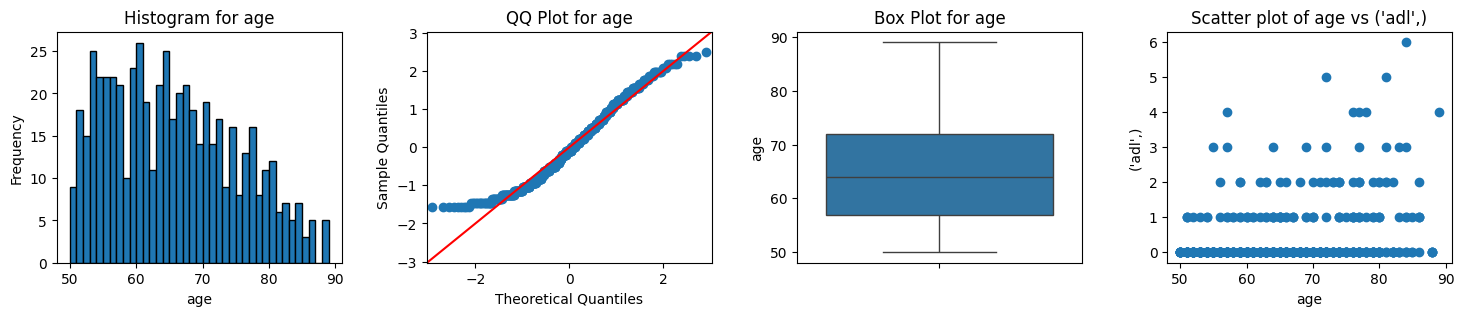

Plotting correlation matrix


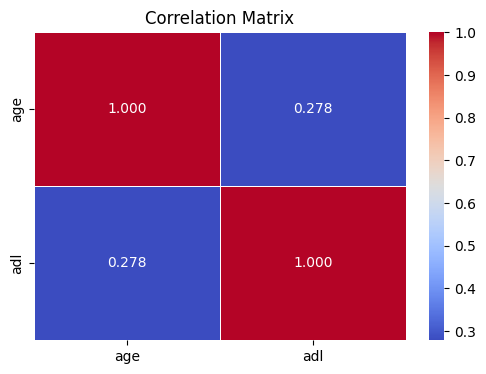

In [3]:
# Check for normal distribution
normal_distribution_list, abnormal_distribution_list = mphd.continous_data.descriptive_analysis(df = data, 
                                                                                                independent_variables=independent_variables[0], 
                                                                                                dependent_variables = dependent_variable,
                                                                                                descriptive_type = "distribution",
                                                                                                plot_dependent_variables = True,
                                                                                                plot_correlation = True, 
                                                                                                round = 4)

# Plot histogram for adl
px.histogram(data, x = dependent_variable, 
             text_auto = True,
             title = "distribution of number of activities of daily living (ADL) difficulties",
             log_y=False)

The mean of ADL = 0.33, but the variance of ADL = 0.65, this might indicate there might be overfitting for the poisson regression model. There is also a high chance for excessive zero according to the distribution of frequency of ADL as well, in which 80.18% of the days of activiteis of daily living difficulties is 0. The correlation betweem age and adl is 0.278, indicate a weak correlation between age and days of ADL. And this weak correlation was having significant association with ADL due to its spearman rank value of 0.2526 with p value < 0.05.

## Check for categorical type of data

+------+--------+--------+--------+-------+------------------+----------------+
| male |  mean  |  std   |  var   |  len  | dispersion_ratio | len_percentage |
+------+--------+--------+--------+-------+------------------+----------------+
|  0   | 0.3118 | 0.7321 | 0.536  | 263.0 |      1.7191      |     0.4696     |
|  1   | 0.3468 | 0.8685 | 0.7543 | 297.0 |      2.1751      |     0.5304     |
+------+--------+--------+--------+-------+------------------+----------------+
There is no statistically significant correlation between male and adl as the p value of 0.61 more than 0.05 and the point biserial correlation = 0.02.


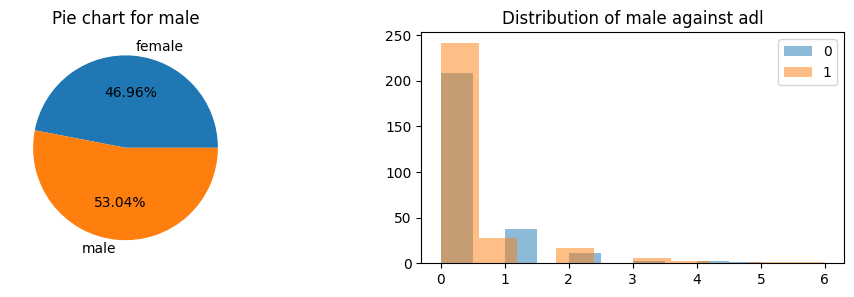

+------+--------+--------+--------+-------+------------------+----------------+
| pact |  mean  |  std   |  var   |  len  | dispersion_ratio | len_percentage |
+------+--------+--------+--------+-------+------------------+----------------+
|  0   | 0.4503 | 0.9497 | 0.902  | 362.0 |      2.0031      |     0.6464     |
|  1   | 0.1111 | 0.3458 | 0.1196 | 198.0 |      1.0761      |     0.3536     |
+------+--------+--------+--------+-------+------------------+----------------+
There is a statistically significant correlation between pact and adl as the p value of 0.00 less than 0.05 and the point biserial correlation = -0.20.


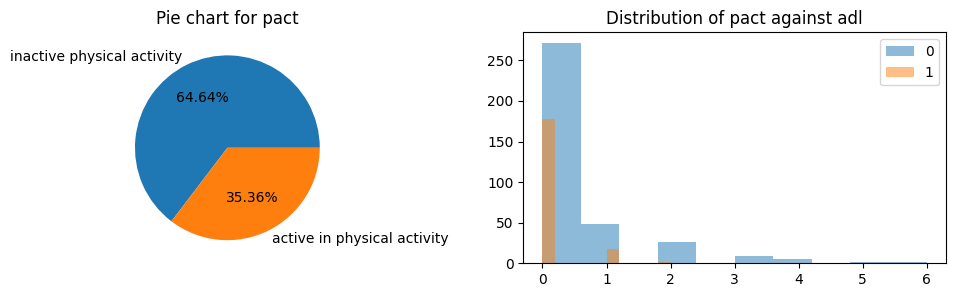

+----------+--------+--------+--------+-------+------------------+----------------+
| limitill |  mean  |  std   |  var   |  len  | dispersion_ratio | len_percentage |
+----------+--------+--------+--------+-------+------------------+----------------+
|    0     | 0.0782 | 0.2787 | 0.0777 | 371.0 |      0.9935      |     0.6625     |
|    1     | 0.8254 | 1.1878 | 1.4108 | 189.0 |      1.7093      |     0.3375     |
+----------+--------+--------+--------+-------+------------------+----------------+
There is a statistically significant correlation between limitill and adl as the p value of 0.00 less than 0.05 and the point biserial correlation = 0.44.


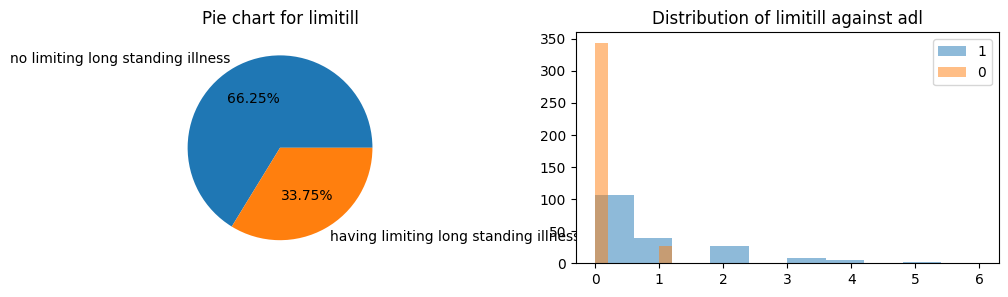

+----------------------+-----------------------------+------------------+----------+
| independent_variable |          test_name          | statistic_values | p_values |
+----------------------+-----------------------------+------------------+----------+
|         male         | Point Biserial Correlations |      0.0217      |  0.6087  |
|         pact         | Point Biserial Correlations |     -0.2012      |   0.0    |
|       limitill       | Point Biserial Correlations |      0.4383      |   0.0    |
+----------------------+-----------------------------+------------------+----------+
Theere is an association between adl and pact, limitill as their Point Biserial Correlations is positive with p value less than 0.05
There is no association between adl and male as their Point Biserial Correlations is negative with p value more than 0.05
+---------------------------------------+--------+--------+--------+-------+------------------+----------------+
|                                    

In [4]:
summary_table, statistic_table = mphd.categorical_data.descriptive_distribution_analysis(df = df, 
                                                                                        independent_variables = list(data_dictionary.keys()), 
                                                                                        dependent_variables = dependent_variable,
                                                                                        data_dictionary = data_dictionary,
                                                                                        statistical_test = "point_biserial_correlations",
                                                                                        round_value = 4)
print(summary_table.round(4).to_markdown(tablefmt = "pretty"))

__intepretation__: </br>

The ADL was confirmed to be sampling zero based on the analysis above.
The mean and variance for most of the categorical independent variables varied a lot except no limit ill. Based on the dispersion ratios provided:

The dispersion ratio for the 'adl' variable is 1.9669, indicating overdispersion.
The dispersion ratios for other variables also suggest overdispersion.


Descriptive Analysis for independent variables:
+-----------------------------+----------+--------+-------+------------+
|            pact             | have_adl | no_adl |  All  | percentage |
+-----------------------------+----------+--------+-------+------------+
| active in physical activity |   20.0   | 178.0  | 198.0 |   35.36    |
| inactive physical activity  |   91.0   | 271.0  | 362.0 |   64.64    |
|             All             |  111.0   | 449.0  | 560.0 |   100.0    |
+-----------------------------+----------+--------+-------+------------+


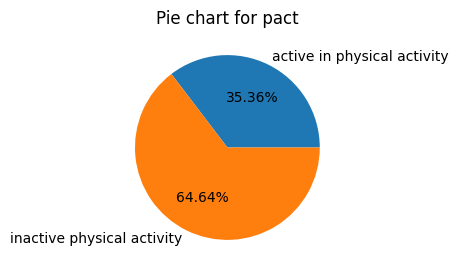

Chi2 test between pact and adl_cat have chi2 statistics value = 17.28 and p_value of 0.00
----------------------------------------------------------------
+---------------------------------------+----------+--------+-------+------------+
|               limitill                | have_adl | no_adl |  All  | percentage |
+---------------------------------------+----------+--------+-------+------------+
| having limiting long standing illness |   83.0   | 106.0  | 189.0 |   33.75    |
|   no limiting long standing illness   |   28.0   | 343.0  | 371.0 |   66.25    |
|                  All                  |  111.0   | 449.0  | 560.0 |   100.0    |
+---------------------------------------+----------+--------+-------+------------+


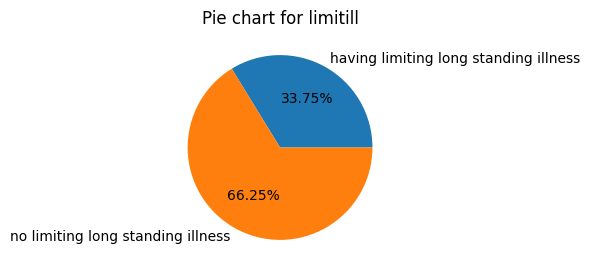

Chi2 test between limitill and adl_cat have chi2 statistics value = 101.93 and p_value of 0.00
----------------------------------------------------------------
+--------+----------+--------+-------+------------+
|  male  | have_adl | no_adl |  All  | percentage |
+--------+----------+--------+-------+------------+
| female |   55.0   | 208.0  | 263.0 |   46.96    |
|  male  |   56.0   | 241.0  | 297.0 |   53.04    |
|  All   |  111.0   | 449.0  | 560.0 |   100.0    |
+--------+----------+--------+-------+------------+


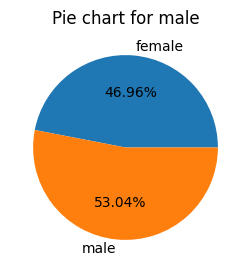

Chi2 test between male and adl_cat have chi2 statistics value = 0.25 and p_value of 0.61
----------------------------------------------------------------
Descriptive Analysis for dependent variables:
+----------+-------+
| adl_cat  | count |
+----------+-------+
| have_adl |  111  |
|  no_adl  |  449  |
|   All    |  560  |
+----------+-------+


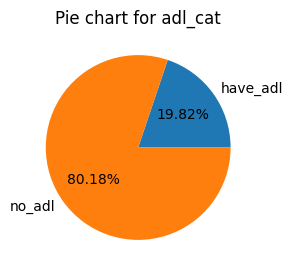

The summary of the statistical tests for independent variable:
+---+----------------------+-----------+------------------+----------+
|   | independent_variable | test_name | statistic_values | p_values |
+---+----------------------+-----------+------------------+----------+
| 0 |         pact         | Chi2 Test |      17.28       |   0.0    |
| 1 |       limitill       | Chi2 Test |      101.93      |   0.0    |
| 2 |         male         | Chi2 Test |       0.25       |   0.61   |
+---+----------------------+-----------+------------------+----------+
The chi2 test is positive and indicate there is an association between adl_cat and pact, limitill.
The chi2 test is negative and indicate there is no association between adl_cat and male
+---+----------------------+-----------------------------+------------------+----------+
|   | independent_variable |          test_name          | statistic_values | p_values |
+---+----------------------+-----------------------------+-----------------

In [5]:
# Convert ADL to categorical
for item in [df, data]:
    item.loc[:,"adl_cat"] = [1 if value > 0 else 0 for value in item.loc[:,dependent_variable]]

# update dictionary
if "adl_cat" not in list(data_dictionary.keys()):
    data_dictionary.update({"adl_cat":{0:"no_adl", 1:"have_adl"}})

# Convert the adl_cat in data for easier reading
data.loc[:,"adl_cat"] = data.loc[:,"adl_cat"].map(data_dictionary["adl_cat"])

# Descriptive analysis on adl_cat as dependent variable
adl2_statistic_table = mphd.categorical_data.categorical_descriptive_analysis(data,
                                                                              independent_variables = independent_variables[1:], 
                                                                              dependent_variables = "adl_cat")

# print the previous statistical test
print(statistic_table.round(4).to_markdown(tablefmt = "pretty"))

# Train the model

In [6]:
# For poisson regression model
poisson_model_list, poisson_summary = mphd.regression.regression_list(df = df, mode = "poisson_regression", 
                                                                                 independent_variables = independent_variables,
                                                                                 dependent_variables = dependent_variable,
                                                                                 p_value_cut_off = 0.05)

# For negative binominal regression model
binom_model_list, binom_summary = mphd.regression.regression_list(df = df, mode = "negative_binominal_regression", 
                                                                  independent_variables = independent_variables,
                                                                  dependent_variables = dependent_variable,
                                                                  p_value_cut_off = 0.05)

# For zero inflated poisson regression model
zip_model_list, zip_summary = mphd.regression.regression_list(df = df, mode = "zero_inflatted_poisson_regression", 
                                                                                 independent_variables = independent_variables,
                                                                                 dependent_variables = dependent_variable,
                                                                                 p_value_cut_off = 0.05)

# For zero inflated negative binominal regression model
zinb_model_list, zinb_summary = mphd.regression.regression_list(df = df, mode = "zero_inflatted_negative_binominal_regression", 
                                                                                 independent_variables = independent_variables,
                                                                                 dependent_variables = dependent_variable,
                                                                                 p_value_cut_off = 0.05)

# Hurdle Model

model_list = [poisson_model_list, binom_model_list, zip_model_list, zinb_model_list]
summary_list = [poisson_summary, binom_summary, zip_summary, zinb_summary]
model_namne = ["poisson", "negative binominal" , "zero inflated poisson", "zero inflated negative binominal"]

## Train on poisson regression modle first

Summary top fit of poisson regression model:
+-------+------------------------+---------------+-----------+------------+----------------+-------------+------------------+----------------------------------+-----------------------------------+-----------------------+
| index |       variables        | num_variables | converged | pseudo_r_2 | log_likelihood | llr_p_value | dispersion_stats | aic_akaike_information_criterion | bic_bayesin_information_criterion | coeff_all_significant |
+-------+------------------------+---------------+-----------+------------+----------------+-------------+------------------+----------------------------------+-----------------------------------+-----------------------+
|  10   |   age,pact,limitill    |       3       |   True    |   0.2669   |   -335.3581    |     0.0     |      1.2292      |             678.7162             |              696.028              |         True          |
|  14   | age,pact,limitill,male |       4       |   True    |   0.2679

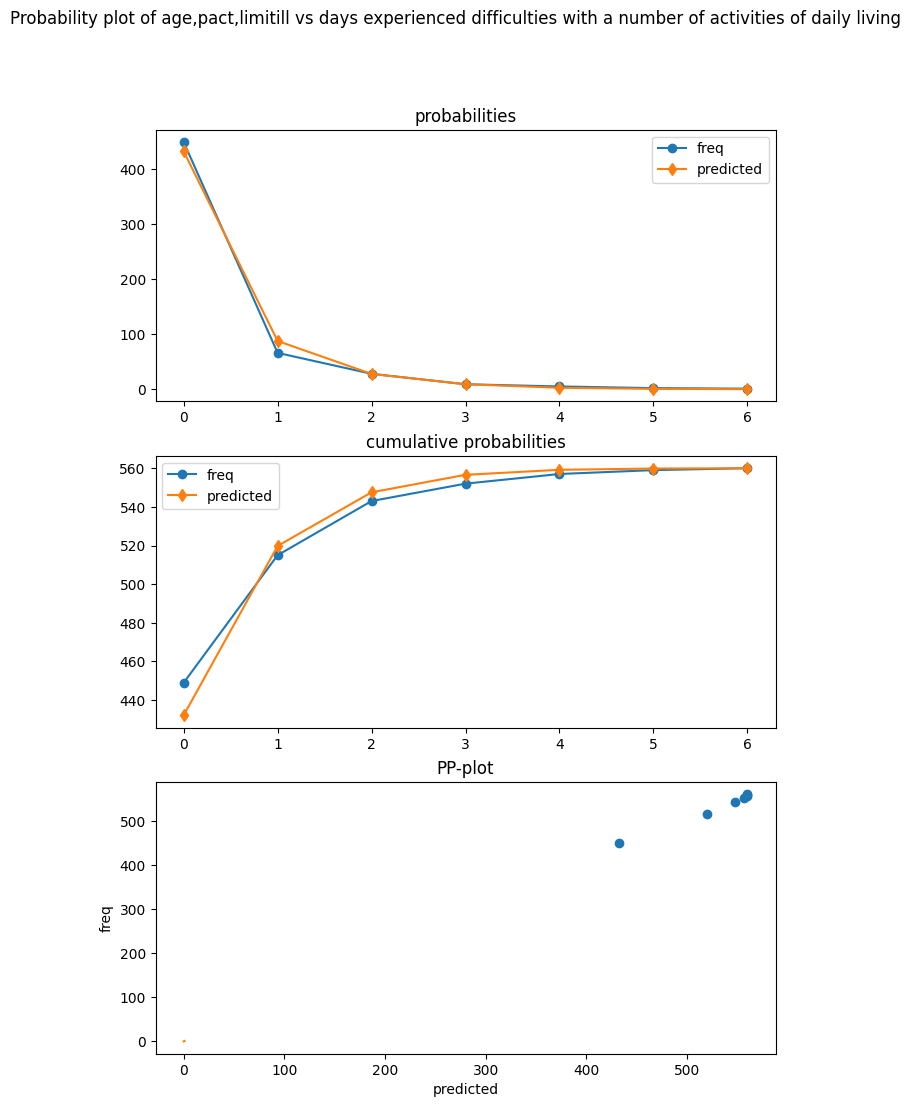

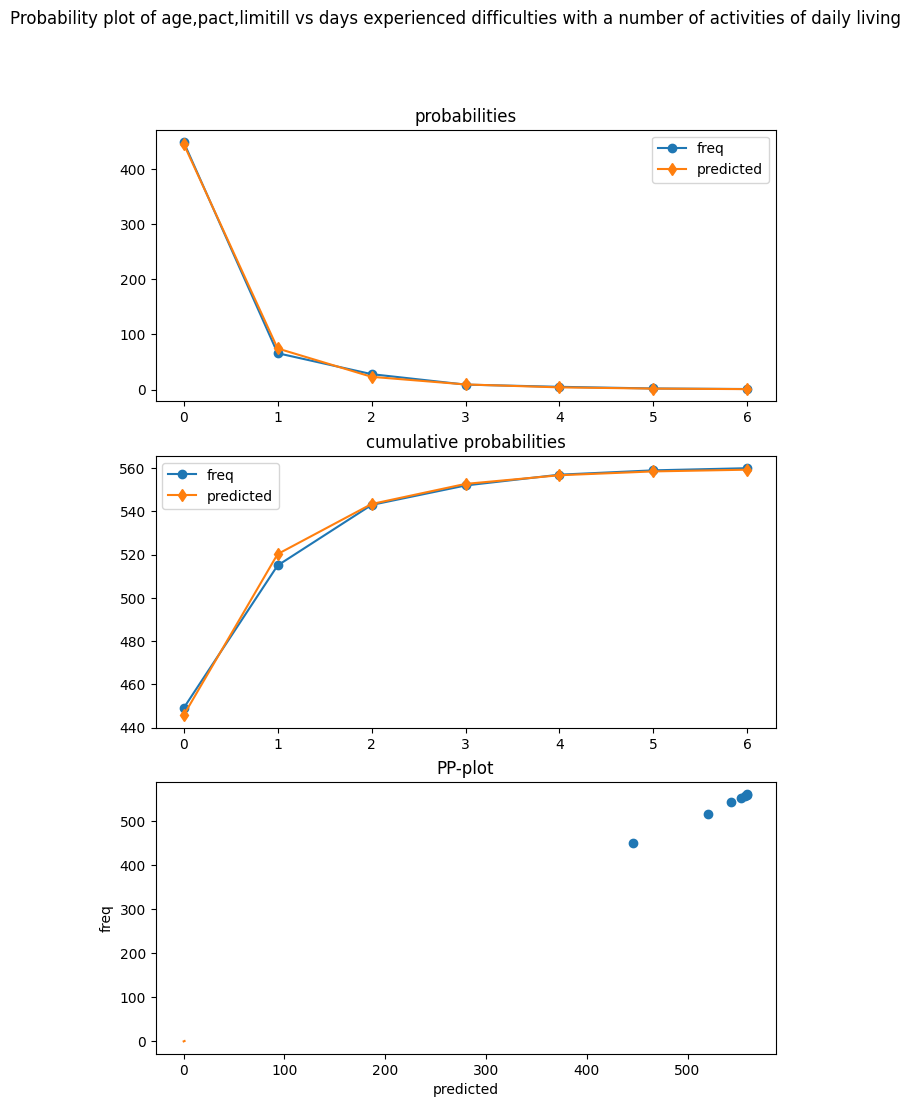

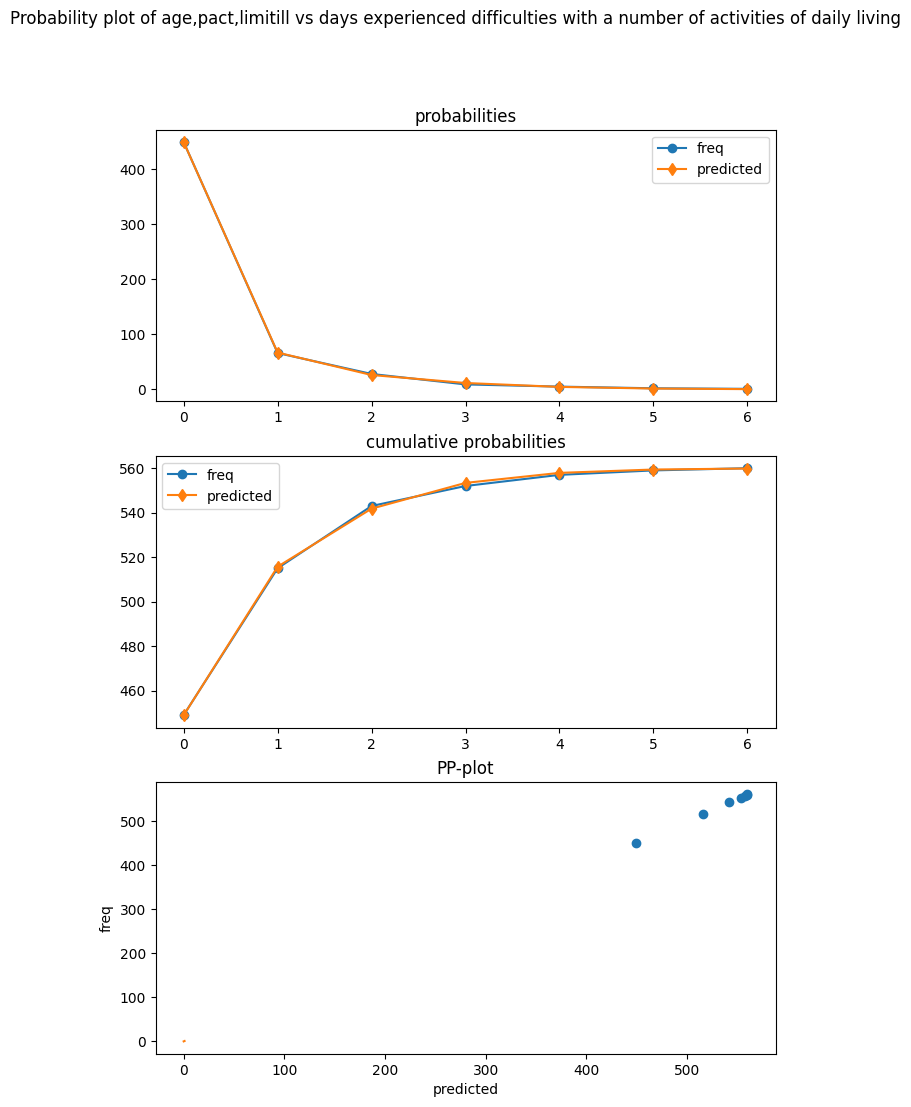

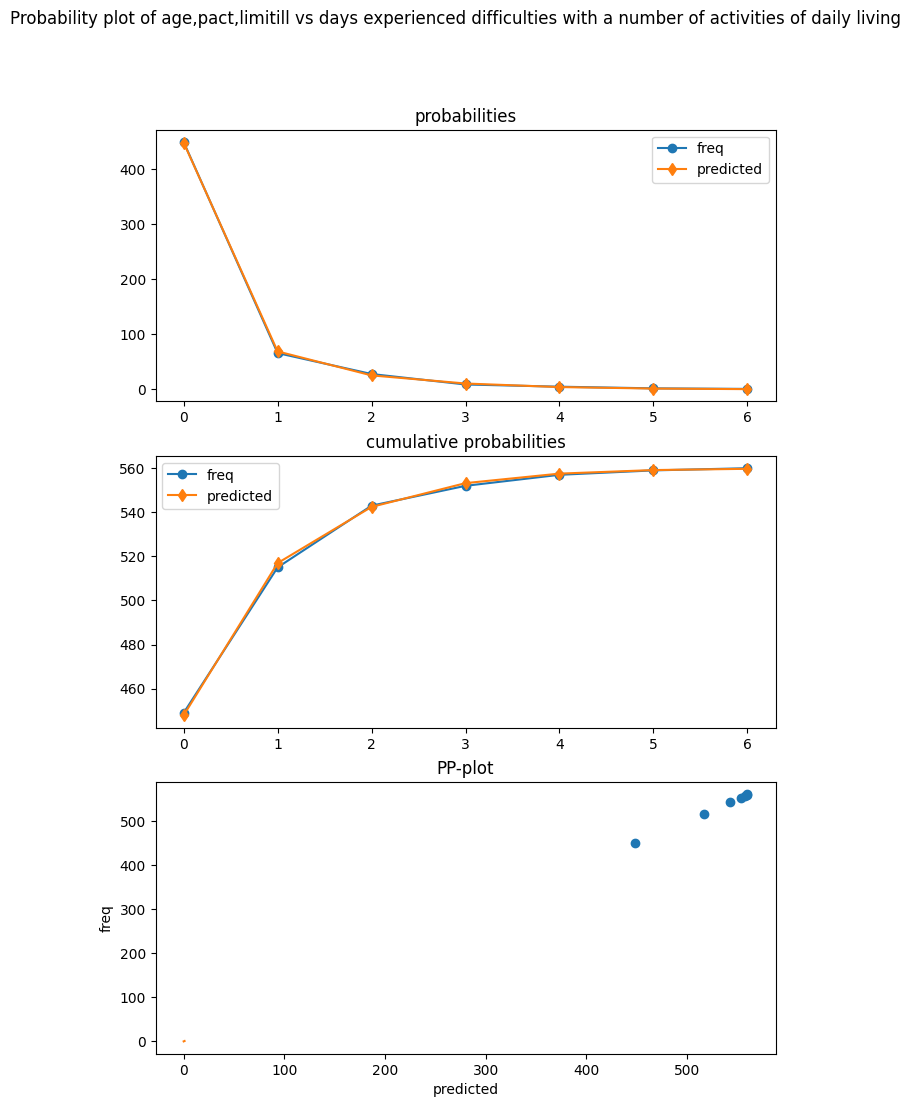

In [7]:
# Assess Poisson Model
columns_to_display = ("index", "variables", "num_variables", "converged", "pseudo_r_2", "log_likelihood", "llr_p_value", 
                      "dispersion_stats", 
                      "aic_akaike_information_criterion", "bic_bayesin_information_criterion", "coeff_all_significant")

for num in range(0, len(summary_list)):
    print(f"Summary top fit of {model_namne[num]} regression model:")
    # Print the top performance from summary
    print(mphd.regression.analyse_model_summary(summary_table = summary_list[num],
                                                top_count = 3,
                                                parameters = {"aic_akaike_information_criterion": True,
                                                              "bic_bayesin_information_criterion": True,
                                                              "pseudo_r_2": False})\
              .loc[:,columns_to_display].round(4).to_markdown(tablefmt = "pretty", index = False))
    
    # Print the interpretation
    mphd.regression.selecting_best_model(model_summary = summary_list[num].round(4), 
                                        best_index = 10, 
                                        mode = model_namne[num], 
                                        dependent_variable = "days experienced difficulties with a number of activities of daily living",
                                        columns_to_display = columns_to_display)
    print(f"The graph number {num} below showing the poisson regression prediction for {dependent_variable} influenced by {list(model_list[num][10].params.index)} vs the actual count:")
    
print("Below graphs compare the expected predictive distribution and the realized frequencies of days experienced difficulties with a number of activities of daily living with the following orders:")
print(model_namne)

We would proceed with all model with age, pact, limitill as independent variables and concatenate into a table for futher exploration due to all the AIC is the lowest in all different type of model from summary tables above. 

In [8]:
# Test dispersion and zero inflation for poisson based on age, pact and limitll
print(f"Table of dispersion test for poisson regression with {independent_variables[0:3]}")
print(poisson_model_list[10].get_diagnostic().test_dispersion().summary_frame().round(4).to_markdown(tablefmt = "pretty", index = False))
print("All the p value < 0.05 test, indicate we reject the null hypothesis. The model is not in equidispersion.")
print("=================================================================================================================")


zero_inflate_chi2 = poisson_model_list[10].get_diagnostic().test_poisson_zeroinflation().chi2
zero_inflate_chi2_p_value = poisson_model_list[10].get_diagnostic().test_poisson_zeroinflation().pvalue_chi2

print(f"The dispersion test for poisson regression with {independent_variables[0:3]} is having chi2 of {zero_inflate_chi2:.4f} and p value of {zero_inflate_chi2_p_value:.4f}, \
indicate we rejec the null hypothesis. There is excessive zero in the poisson model.")


Table of dispersion test for poisson regression with ('age', 'pact', 'limitill')
+-----------+--------+------------+---------------+
| statistic | pvalue |   method   |  alternative  |
+-----------+--------+------------+---------------+
|  4.2687   |  0.0   |   Dean A   | mu (1 + a mu) |
|  4.2687   |  0.0   |   Dean B   | mu (1 + a mu) |
|  2.0373   | 0.0416 |   Dean C   |  mu (1 + a)   |
|  4.7238   |  0.0   |   CT nb2   | mu (1 + a mu) |
|  4.7238   |  0.0   |   CT nb1   |  mu (1 + a)   |
|  3.0006   | 0.0027 | CT nb2 HC3 | mu (1 + a mu) |
|  2.2185   | 0.0265 | CT nb1 HC3 |  mu (1 + a)   |
+-----------+--------+------------+---------------+
All the p value < 0.05 test, indicate we reject the null hypothesis. The model is not in equidispersion.
The dispersion test for poisson regression with ('age', 'pact', 'limitill') is having chi2 of 17.9221 and p value of 0.0000, indicate we rejec the null hypothesis. There is excessive zero in the poisson model.


In [9]:
# Combine all model
all_model_summary = mphd.regression.generate_count_regression_combine_table(model_list=model_list, 
                                                                            independent_variables = independent_variables[0:3],
                                                                            best_model_index=10, 
                                                                            model_name = ["poisson regression", 
                                                                                          "negative binominal", 
                                                                                          "zero inflated poisson regression", 
                                                                                          "zero inflated negative binominal"])
# Show the table and round all values to 4
all_model_summary.round(4).fillna("")

poisson regression                 negative binominal  \
                            coefficient std_err p_value        coefficient   
const                          0.009426  1.7624     0.0           0.009499   
age                            1.037059  1.0079     0.0            1.03687   
pact                           0.467314  1.2627  0.0011           0.483768   
limitill                       7.544487  1.2321     0.0             7.5039   
inflation                                                                    
inflate_const                                                                
inflate_age                                                                  
inflate_pact                                                                 
inflate_limitill                                                             
alpha                                                             1.793421   
converged                          True                               True   
aic                          678.716205                          666.40128   
bic                          696.027952                         688.040964   
pseudo_r_2                     0.266946                           0.187481   
log_likelihood              -335.358102                         -328.20064   
ll_null                     -457.480937                        -403.929702   
llr_p_value                         0.0                                0.0   
dispersion_statistic           1.229204                           1.036344   

                                     zero inflated poisson regression          \
                     std_err p_value                      coefficient std_err   
const                 1.9509     0.0                         0.021315  1.8927   
age                   1.0095  0.0001                         1.029215   1.009   
pact                  1.2908  0.0044                          0.35863  1.2802   
limitill              1.2483     0.0                         8.525462  1.2428   
inflation                                                                       
inflate_const                                                2.152156  6.6094   
inflate_age                                                  0.972577  1.0258   
inflate_pact                                                 0.354786  4.1476   
inflate_limitill                                              1.67096  2.6928   
alpha                 1.2487  0.0085                                            
converged                                                       False           
aic                                                         668.09737           
bic                                                        702.720864           
pseudo_r_2                                                   0.196779           
log_likelihood                                            -326.048685           
ll_null                                                   -405.926423           
llr_p_value                                                       0.0           
dispersion_statistic                                         1.099585           

                             zero inflated negative binominal                  
                     p_value                      coefficient std_err p_value  
const                    0.0                         0.015036  2.0308     0.0  
age                   0.0013                         1.034623  1.0094  0.0003  
pact                     0.0                         0.475539  1.2873  0.0033  
limitill                 0.0                         7.562082  1.2466     0.0  
inflation                                                                      
inflate_const         0.6848                         0.539641  1.3812  0.0562  
inflate_age           0.2755                                                   
inflate_pact          0.4663                                                   
inflate_limitill      0.6043           

__Interpretation__:

</br>
The difference of mean and variance for limit illness (limitill) and physical activities (pact) shows data might be overdispersion also shown in the dispersion statistic for poisson regression where the dispersion statistic = 1.2292, which show minor overdispion of the data. Negative Binomial regression can handle some level of zero inflation while also accommodating potential overdispersion compared to the standard Poisson model, along with zero inflated Negative Binominal regression. From the table above: </br>

1. Coefficients and Significance: </br>
    - Both models show similar trends for the coefficients of age, pact, and limitill, with statistically significant relationships (p-values < 0.01). This suggests these variables have a similar impact on the expected count of the dependent variable (adl) in both models. </br>
2. Model Fit: </br>
    - Pseudo R-Squared: Both models have relatively low pseudo R-squared values (around 0.19). While not a definitive measure, these values suggest a moderate improvement in fit compared to a null model. </br>
    - Log-likelihood: ZINB has a slightly lower log-likelihood (-326.947) compared to NB (-328.201). Lower log-likelihood indicates a better fit, so ZINB has a slight edge here. </br>
    - AIC of ZINB (665.8947) is lower slightly compare to NB model (666.4013), indicating the ZINB is having a better model fit compare to NM model. </br>
3. Zero Inflation: </br>
    - From the table above, there is a high chance for excessive zero according to the distribution of frequency of ADL as well, in which 80.18% of the days of activiteis of daily living difficulties is 0. </br>
    - The ZINB model includes an inflation component with a coefficient for "inflate_const" (0.5396, p-value = 0.0562), however, due to its p value more than 0.05, suggesting not statistically significant effect on the log-odds of having a zero count. </br>
4. Overdispersion: </br>
    - The dispersion statistic for the NB model (1.0363) is very close to 1, indicating that overdispersion might not be a major concern. </br>
    - The dispersion statistic for the ZINB model (1.0519) is slightly higher than the NB model, but still very close to 1. </br>
5. Prediction plot: </br>
    - From  graph that compare the expected predictive distribution and the realized frequencies of days experienced difficulties with a number of activities of daily living, the poisson regression model underestimates the number of zeros and overestimates counts of one. The negative binominal regression only overestimates count of one. Both the zero inflated poisson regression and negative binominal regression model are quiet good as the predicted probabilities match the observed data well in both probability plot and cumulative plot. However, the pp plot didn't really show a randomly scattered residuals around zero imply the model captures the data adequately, indicating there might be systematic over/under-prediction for all the regression model. </br>

Choosing the Better Model: </br>

Given the minimal difference in log-likelihood and the dispersion statistic being close to 1 in both models, the slight improvement in fit with ZINB might not be substantial. The best model is believed to be the NB model as it's converged was True compare to ZINB model.

## Interpret the negative binominal model
#### Crude Analysis

Crude analysis for age:
                     NegativeBinomial Regression Results                      
Dep. Variable:                    adl   No. Observations:                  560
Model:               NegativeBinomial   Df Residuals:                      558
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 May 2024   Pseudo R-squ.:                 0.05098
Time:                        13:55:14   Log-Likelihood:                -383.34
converged:                       True   LL-Null:                       -403.93
Covariance Type:            nonrobust   LLR p-value:                 1.387e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7255      0.731     -7.831      0.000      -7.159      -4.292
age            0.0676      0.011      6.422      0.000       0.047       0.088
alpha          2.1629      0

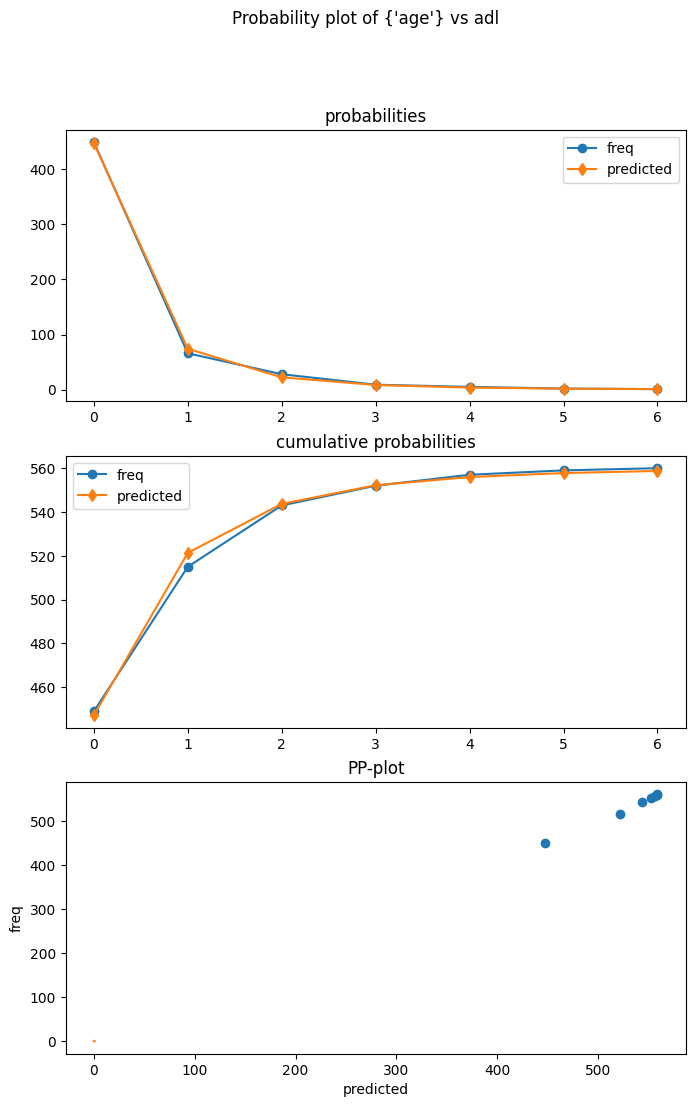

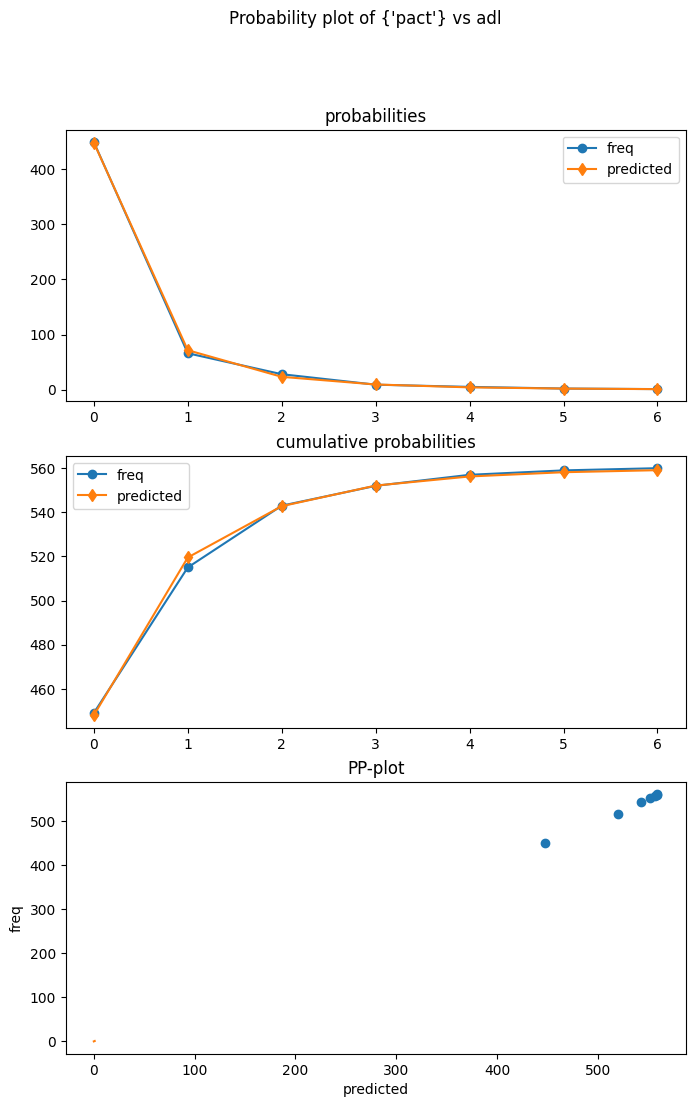

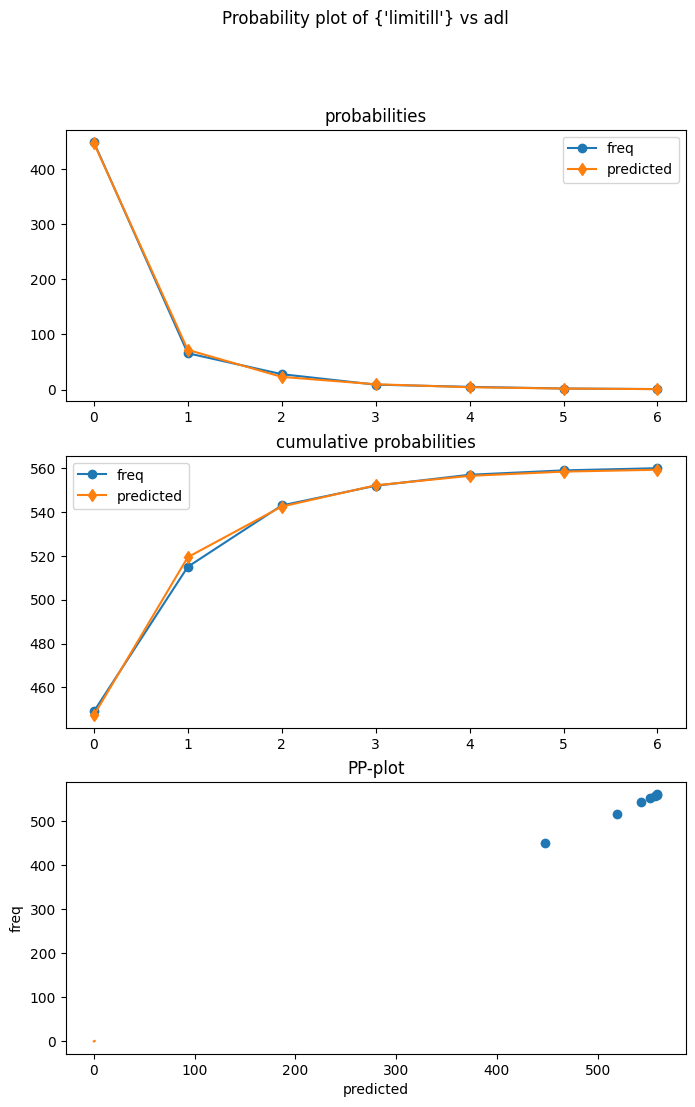

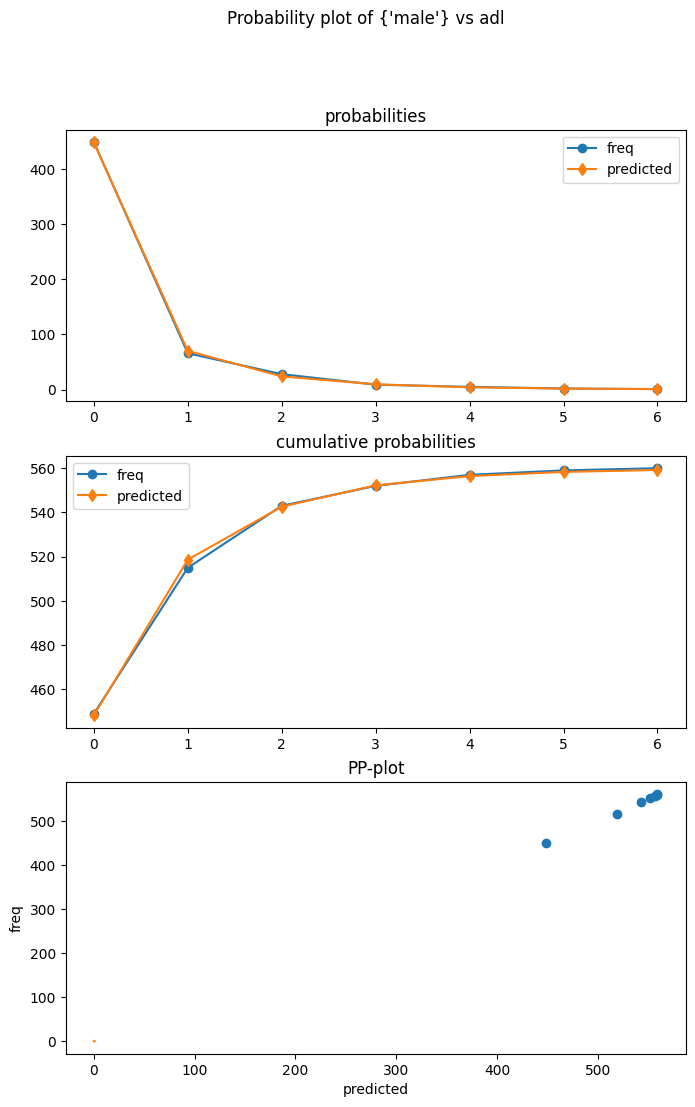

In [10]:
# Crude analysis
combine_params_df, combine_exp_params_df = mphd.regression.crude_analysis(summary_model_df=binom_summary,
                                                                          df = df,
                                                                          mode = "count",
                                                                          dependent_variable = dependent_variable,
                                                                          data_dictionary = data_dictionary,
                                                                          round_value = 4,
                                                                          p_value_cut_off= 0.05)

### For model with age, pact and limitill

                     NegativeBinomial Regression Results                      
Dep. Variable:                    adl   No. Observations:                  560
Model:               NegativeBinomial   Df Residuals:                      556
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.1875
Time:                        13:55:17   Log-Likelihood:                -328.20
converged:                       True   LL-Null:                       -403.93
Covariance Type:            nonrobust   LLR p-value:                 1.277e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6566      0.668     -6.968      0.000      -5.966      -3.347
age            0.0362      0.009      3.839      0.000       0.018       0.055
pact          -0.7262      0.255     -2.845      0.0

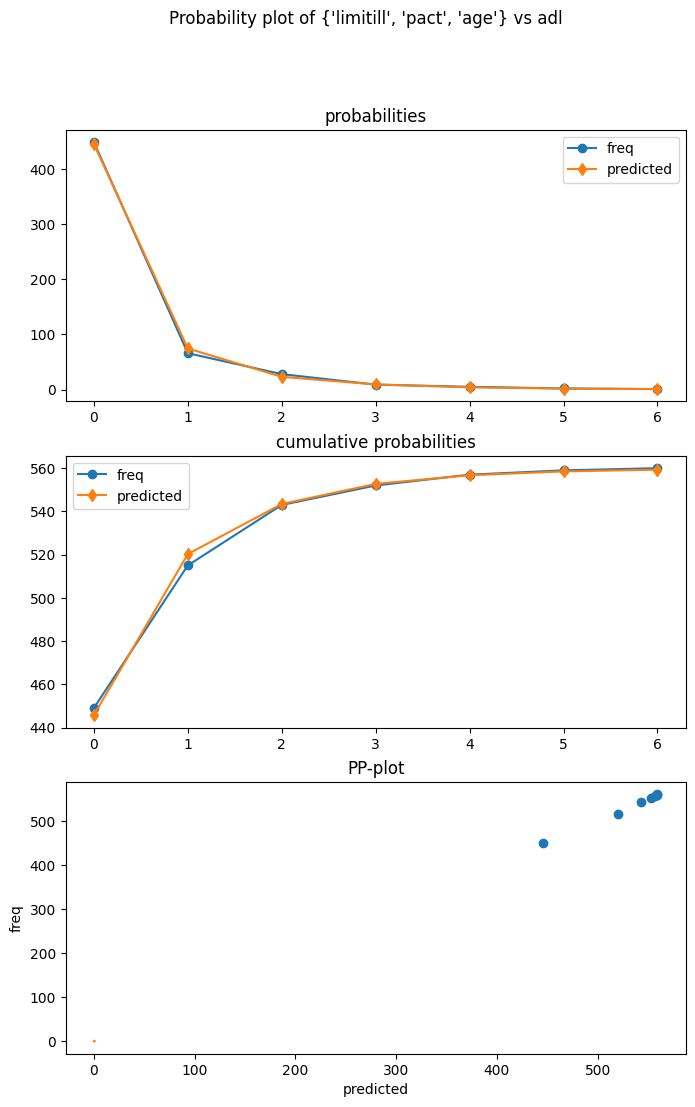

In [11]:
mphd.regression.analyse_model(binom_model_list[10], 
                              df = df,
                              mode = "count",
                              data_dictionary=data_dictionary,
                              dependent_variable=dependent_variable)

### Generate the adjusted and non-adjusted dataframe

In [12]:
# Generate the params and exp_params for the model selected
best_model_params, best_model_exp_params = mphd.regression.generate_params_df(binom_model_list[10])

# Merge with exponentiated params of all independendent variables generated from crude analysis
print(best_model_exp_params.drop(columns = ["std_err", "t_statistic"])\
    .merge(combine_exp_params_df, left_index = True, right_index=True, how = "left", suffixes = ["_adj", "_crude"])\
    .round(4).to_markdown(tablefmt = "pretty"))

+----------+-----------------+-------------+----------+-----------+-------------------+---------+-------------+---------------+------------+-------------+
|          | coefficient_adj | p_value_adj | 2.5%_adj | 97.5%_adj | coefficient_crude | std_err | t_statistic | p_value_crude | 2.5%_crude | 97.5%_crude |
+----------+-----------------+-------------+----------+-----------+-------------------+---------+-------------+---------------+------------+-------------+
|  const   |     0.0095      |     0.0     |  0.0026  |  0.0352   |        nan        |   nan   |     nan     |      nan      |    nan     |     nan     |
|   age    |     1.0369      |   0.0001    |  1.0179  |  1.0562   |       1.07        | 1.0106  |   6.4215    |      0.0      |   1.0481   |   1.0923    |
|   pact   |     0.4838      |   0.0044    |  0.2933  |  0.7978   |      0.2468       |  1.307  |   -5.2266   |      0.0      |   0.146    |    0.417    |
| limitill |     7.5039      |     0.0     |  4.8583  |  11.5901  |   

__Age__:

The coefficient for age is positive and significant in both models. This suggests that increasing age is associated with an increase in the expected count of the outcome variable, regardless of the other variables.
The crude model shows a slightly higher coefficient for age compared to the adjusted model. However, they are likely within the confidence intervals of each other (check if the CIs overlap). This suggests that other variables in the adjusted model might slightly explain the relationship between age and the outcome.

__pact__:

The crude model shows a positive coefficient for pact, but the adjusted model shows a negative and significant coefficient. This suggests that the initial positive association between pact and the outcome might be partially explained by the other variables in the adjusted model.

__limitill__:

Both models show a positive and significant coefficient for limitill. This suggests that increasing limitill is associated with an increase in the expected count of the outcome variable, even when considering the other variables.

## Looking for confounder factors

In [15]:
for num in range(4):
    print(f"For {model_namne[num]} regression model.")
    mphd.regression.find_confounder(summary_list[num], "pact")
    print("====================================================================")

For poisson
+---+---------+------------+--------------------+---------+----------+
|   | b1_pact | b1_p_value | b2_variables_pact+ | b2_pact | b1-b2/b1 |
+---+---------+------------+--------------------+---------+----------+
| 0 | -1.3993 |    0.0     |        age         | -1.1588 | 17.1877  |
| 1 | -1.3993 |    0.0     |      limitill      | -0.9237 | 33.9883  |
| 2 | -1.3993 |    0.0     |        male        | -1.3969 |  0.1718  |
+---+---------+------------+--------------------+---------+----------+
Noted coefficient of pact changed more than 10% if model including ['age', 'limitill'] as shown on table above, indicating the ['age', 'limitill'] is possible confounder for the model above.
The coefficients of ['male'] did not change the b1 of pact for more than 10%, indicating the variable of ['male'] not the confounder factors for the model.
For negative binominal
+---+---------+------------+--------------------+---------+----------+
|   | b1_pact | b1_p_value | b2_variables_pact+ | 

## Conclusion

This analysis investigated factors associated with the frequency of days with Activities of Daily Living (ADL) difficulties. We compared four regression models: Poisson, negative binomial, zero-inflated Poisson, and zero-inflated negative binomial. All models included age, physical activity (pact), and presence of physical limitations (limitill) as potential predictors.

__Key Findings__:

Overdispersion in Poisson Model: 

The dispersion tests strongly suggest overdispersion in the data (variance higher than expected by the Poisson model). This indicates the Poisson model might not be the most suitable choice.
Negative Binomial Model as Best Fit:

Both AIC and BIC values were lowest for the negative binomial model with age, pact, and limitill, suggesting a better fit for the data compared to other models with the same combination of variables.

The negative binomial model exhibits equidispersion (variance proportional to the mean), which is desirable for this model.

Significant Coefficients: The negative binomial model with all three variables (_adj) shows statistically significant coefficients for all variables, indicating they are associated with the frequency of ADL difficulties.

Zero-inflated Models: While zero-inflated models (Poisson and negative binomial) had slightly lower AIC values, they did not converge in all cases, and some coefficients might not be significant.

The age and presence of physical limitations (limitill) is the confounding factor that influence the physical activity due to more than 10% changes in coefficient of pact upon analysis.


Based on the presence of overdispersion, lower AIC and BIC values, and significant coefficients, the negative binomial regression model with age, pact, and limitill emerges as the most suitable model for analyzing the factors associated with the frequency of ADL difficulties. This model provides a more accurate representation of the data and allows for the estimation of combined effects of the variables on ADL difficulties.